## Тема “Обучение без учителя”

### __Задание 1__

In [1]:
# код для подавления предупреждений в процессе выполнения дальнейшего кода
import warnings
warnings.filterwarnings('ignore')

### Импортируйте библиотеки pandas, numpy и matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
#### вместо него загрузил датасет fetch_california_housing

In [3]:
# загрузка датасета из встроенных наборов данных библиотеки sklearn
from sklearn.datasets import fetch_california_housing

In [4]:
fch = fetch_california_housing()

In [5]:
# информация о датасете
for line in fch.DESCR.split('\n'):
    print(line)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

**Описание датасета** - *ДОБАВИТЬ В ИТОГОВЫЙ ПРОЕКТ*

Статистические данные о жилищном рынке Калифорнии, основанные на переписи населения и других источниках, собранных в 1990 году.

* **MedInc** - медианный доход домохозяйств (Median Income)
* **HouseAge** - медианный возраст домов в годах
* **AveRooms** - среднее количество комнат на дом
* **AveBedrms** - среднее количество спален на дом
* **Population** - общее количество проживающих
* **AveOccup** - среднее количество жильцов (Average Occupants) на дом
* **Latitude** - географическая широта местоположения
* **Longitude** - географическая долгота местоположения

### Создайте датафреймы X и y из этих данных.

In [6]:
X = pd.DataFrame(fch.data, columns=fch.feature_names)
y = pd.Series(fch.target)

In [7]:
X.head() # признаки недвижимости

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Масштабируйте данные с помощью StandardScaler.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
#  для нормализации данных, чтобы улучшить качество работы модели
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Постройте модель TSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [12]:
from sklearn.manifold import TSNE

In [13]:
# понижаем размерность данных до 2-х компонент для дальнейшей визуализации
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

### Постройте диаграмму рассеяния на этих данных.

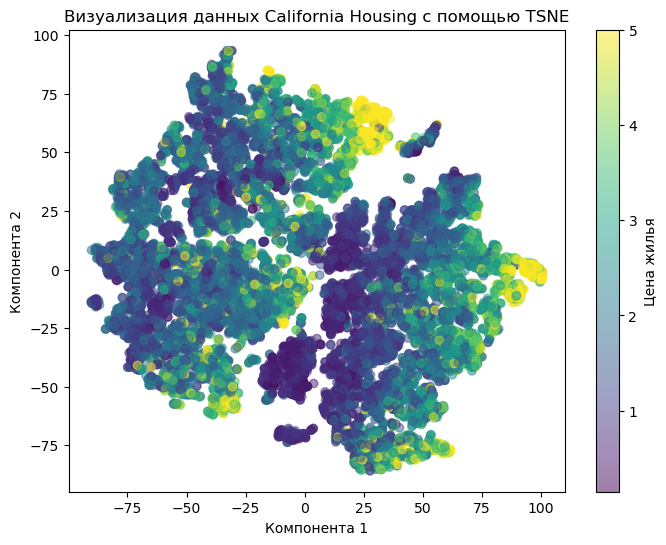

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Цена жилья')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.title('Визуализация данных California Housing с помощью TSNE')
plt.show()

### __Задание 2__
### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42) 
# random_state - для воспроизводимости результатов
clusters = kmeans.fit_predict(X_train_scaled)

### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

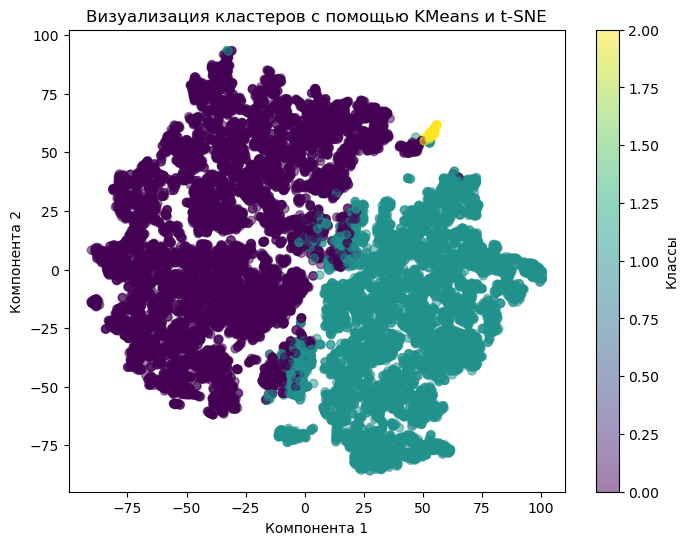

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(label='Классы')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.title('Визуализация кластеров с помощью KMeans и t-SNE')
plt.show()

### Вычислите средние значения price и CRIM в разных кластерах.

#### В датасете "Boston House Prices" столбец `CRIM` представляет собой уровень преступности на душу населения по различным городам в районе Бостона (уровень преступности часто влияет на стоимость недвижимости).
#### В датасете "California Housing", доступном через функцию `fetch_california_housing()` из библиотеки `scikit-learn`, нет прямого аналога столбца `CRIM`.
#### Можно использовать, например, `MedInc` (медианный доход), поскольку он является важным социально-экономическим индикатором, влияющим на стоимость жилья и может быть полезен в теории, как и уровень преступности

In [22]:
# Вычисление средних значений price и MedInc по кластерам
X_train['Cluster'] = clusters
X_train['Price'] = y_train

# Средние значения в разных кластерах
mean_values = X_train.groupby('Cluster')[['Price', 'MedInc']].mean()
print(mean_values)

            Price    MedInc
Cluster                    
0        2.142137  3.925416
1        1.979968  3.824625
2        1.618831  3.336702


### __*Задание 3__
### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [23]:
# Применение модели KMeans к тестовым данным
clusters_test = kmeans.predict(X_test_scaled)

# Добавление информации о кластерах к тестовым данным
X_test['Cluster'] = clusters_test
X_test['Price'] = y_test

### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

#### здесь используем HouseAge (возраст дома) вместо CRIM

In [24]:
mean_values_test = X_test.groupby('Cluster')[['Price', 'HouseAge']].mean()
print(mean_values_test)

            Price   HouseAge
Cluster                     
0        2.131424  28.278282
1        1.949519  29.534595
2        1.607133  20.400000
